# Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [16]:
df = pd.read_csv('fuel-econ.csv')

In [17]:
df.shape

(3929, 20)

In [18]:
df.head(4)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


## Converting `VClass` column to a categorical column

In [19]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses);

# Exercise 1: Categorical Plot

Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 


**Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [20]:
df['fuelType'].value_counts()

fuelType
Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: count, dtype: int64

''

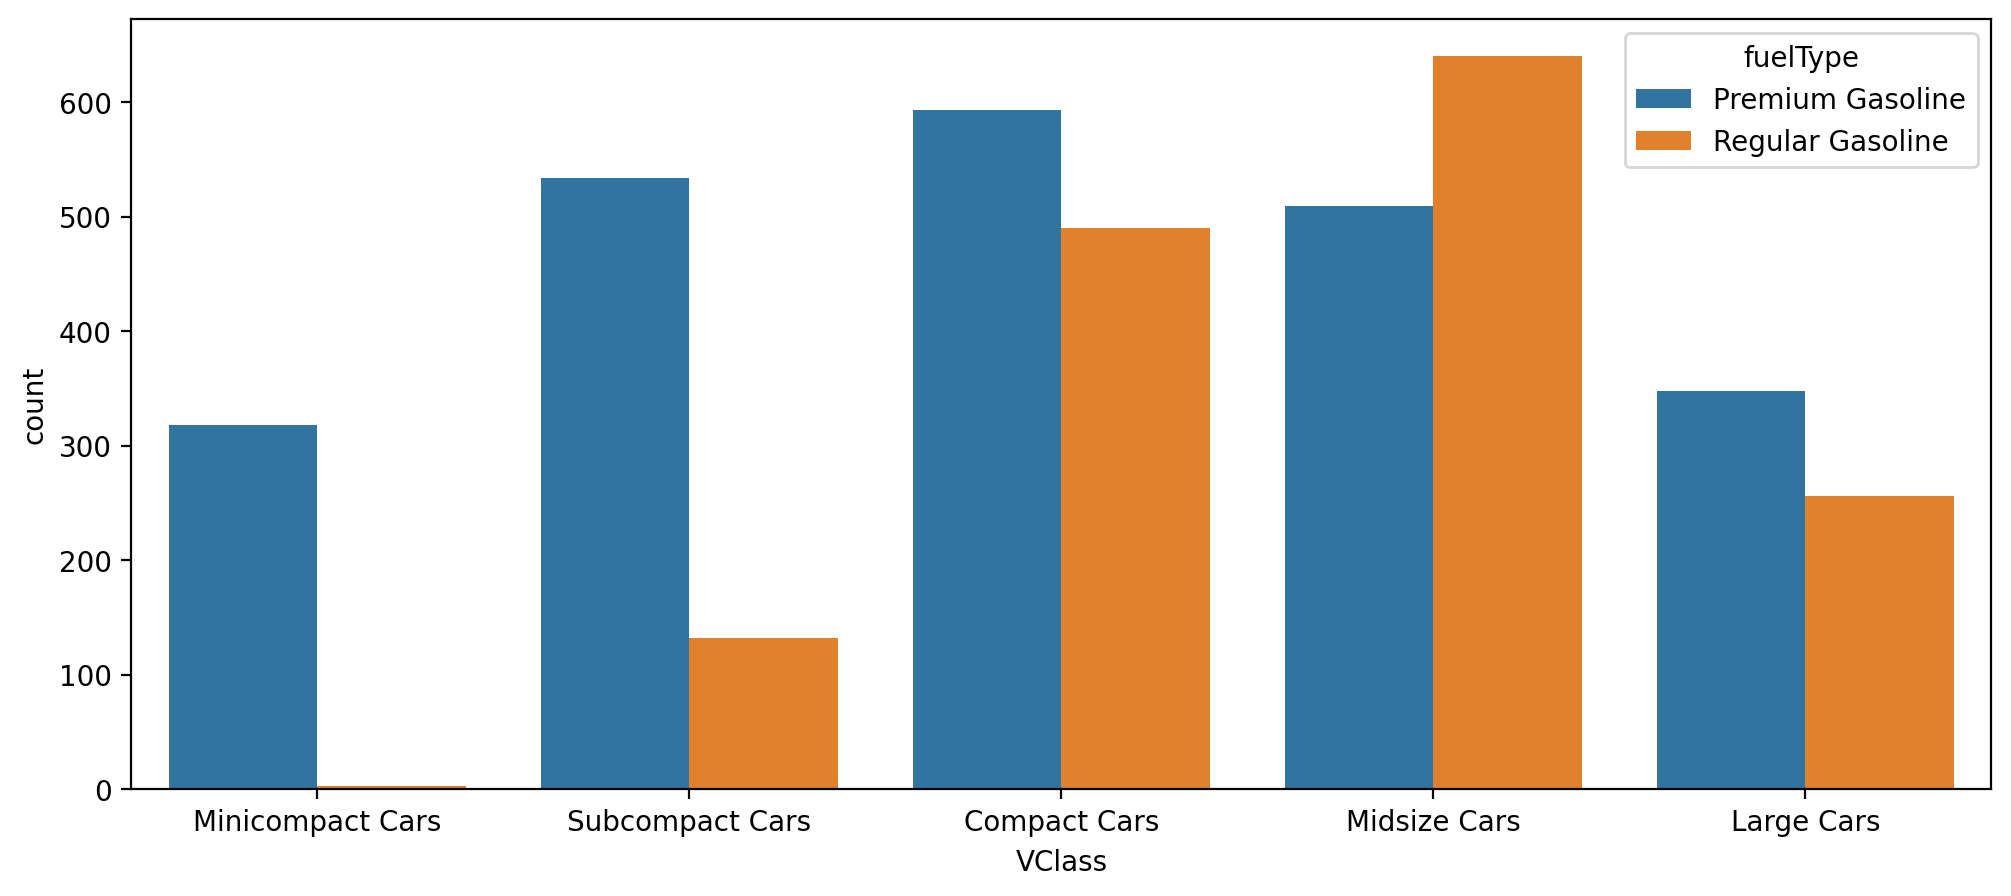

In [21]:
plt.figure(figsize=(12,5))
df_plot = df[(df['fuelType']=='Premium Gasoline') | (df['fuelType']=='Regular Gasoline')]
sns.countplot(data=df_plot, x='VClass', hue='fuelType')
;

# Exercise 2: Facet Plot

Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [61]:
df['make'].value_counts(ascending=False).head(18)

make
BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
MINI             201
Audi             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: count, dtype: int64

In [62]:
df_plot = df[df['make'].isin(df['make'].value_counts(ascending=False).head(18).index)]
df_plot

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


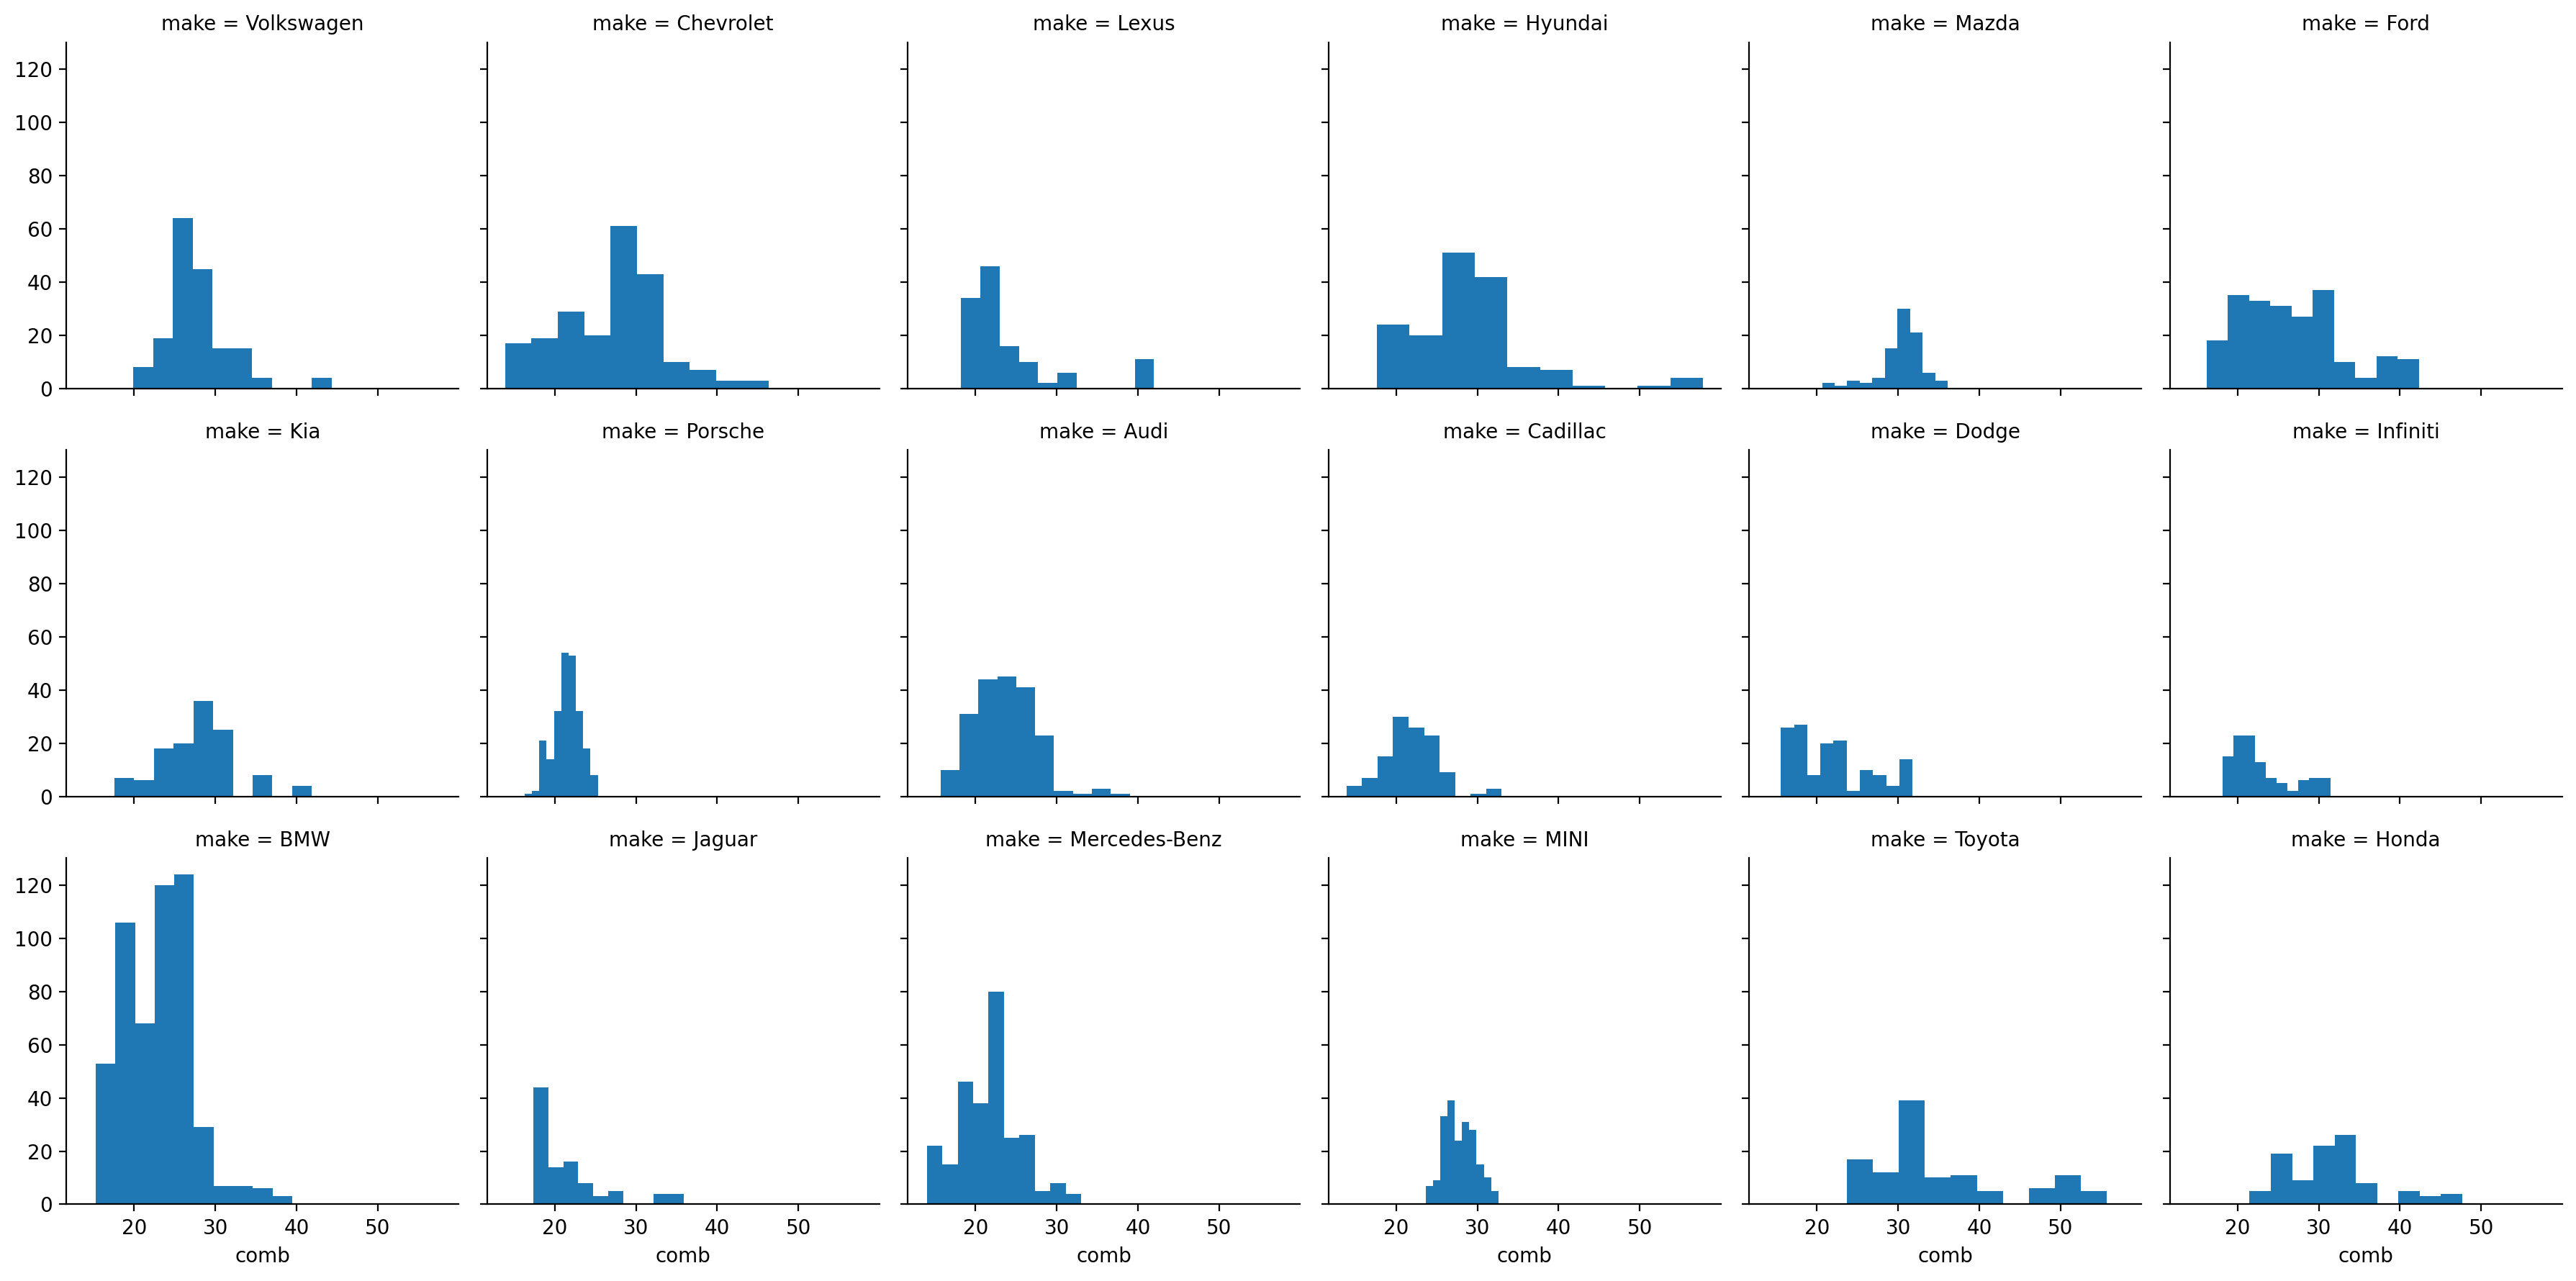

In [68]:
group_means = df_plot[['make', 'comb']].groupby(['make']).mean()

group_order = group_means.sort_values(['comb'], ascending=False).index

g = sns.FacetGrid(data=df_plot, col='make', col_wrap=6)
g.map(plt.hist, 'comb');

# Example 3

Continuing on from the previous task, use a bar chart to plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset. Make sure to estimate the uncertainty by showing the standard deviation.

In [107]:
df_mean = df_plot[['make', 'comb']].groupby('make').mean()
df_mean

,comb
make,
Audi,23.639240
BMW,23.004798
Cadillac,21.773203
Chevrolet,27.224809
Dodge,21.812190
Ford,26.796018
Honda,31.588841
Hyundai,28.793620
Infiniti,23.002081


In [115]:
order = df_mean.sort_values(by='comb', ascending=False)
order

,comb
make,
Toyota,35.184424
Honda,31.588841
Mazda,30.397474
Hyundai,28.793620
Kia,27.843018
MINI,27.807288
Volkswagen,27.769875
Chevrolet,27.224809
Ford,26.796018


In [116]:
order = order.index

''

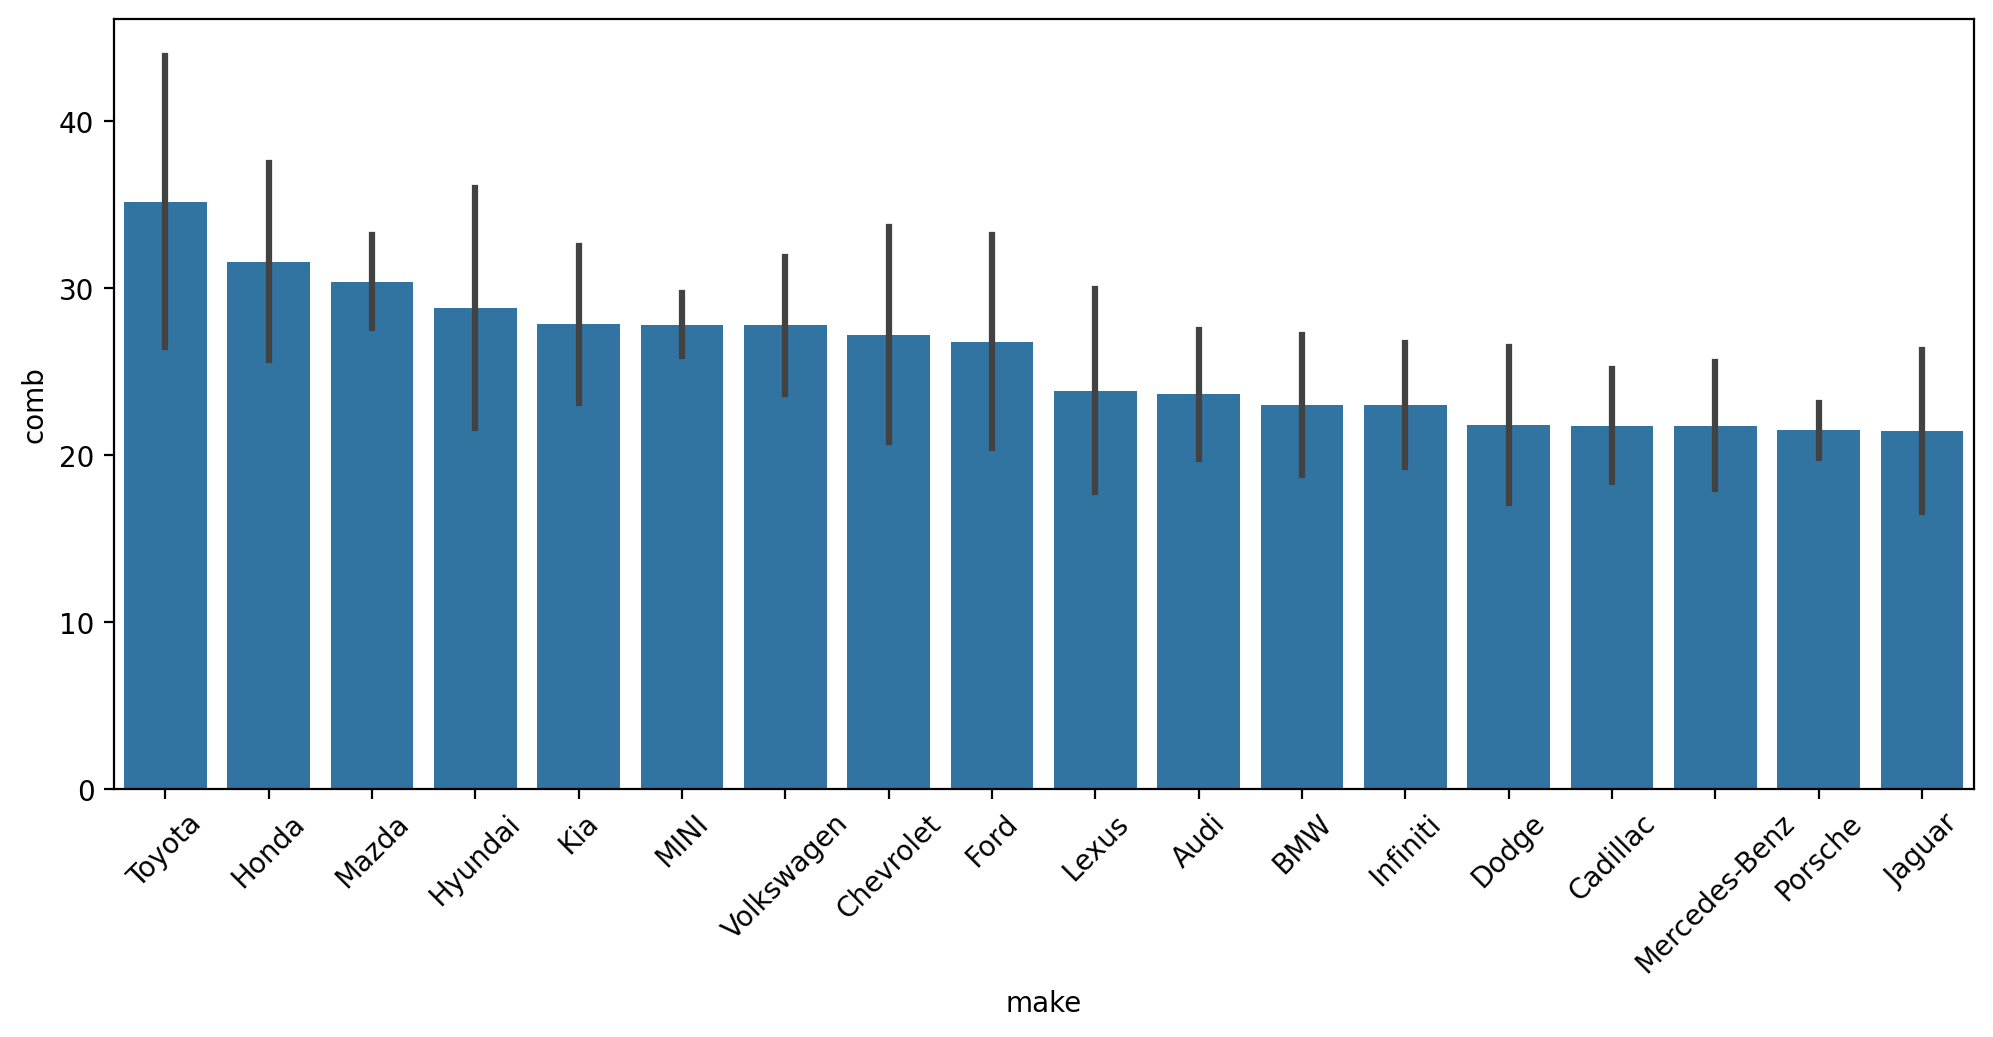

In [117]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_plot, x='make', y='comb',order=order, errorbar='sd')
plt.xticks(rotation=45);

;

''

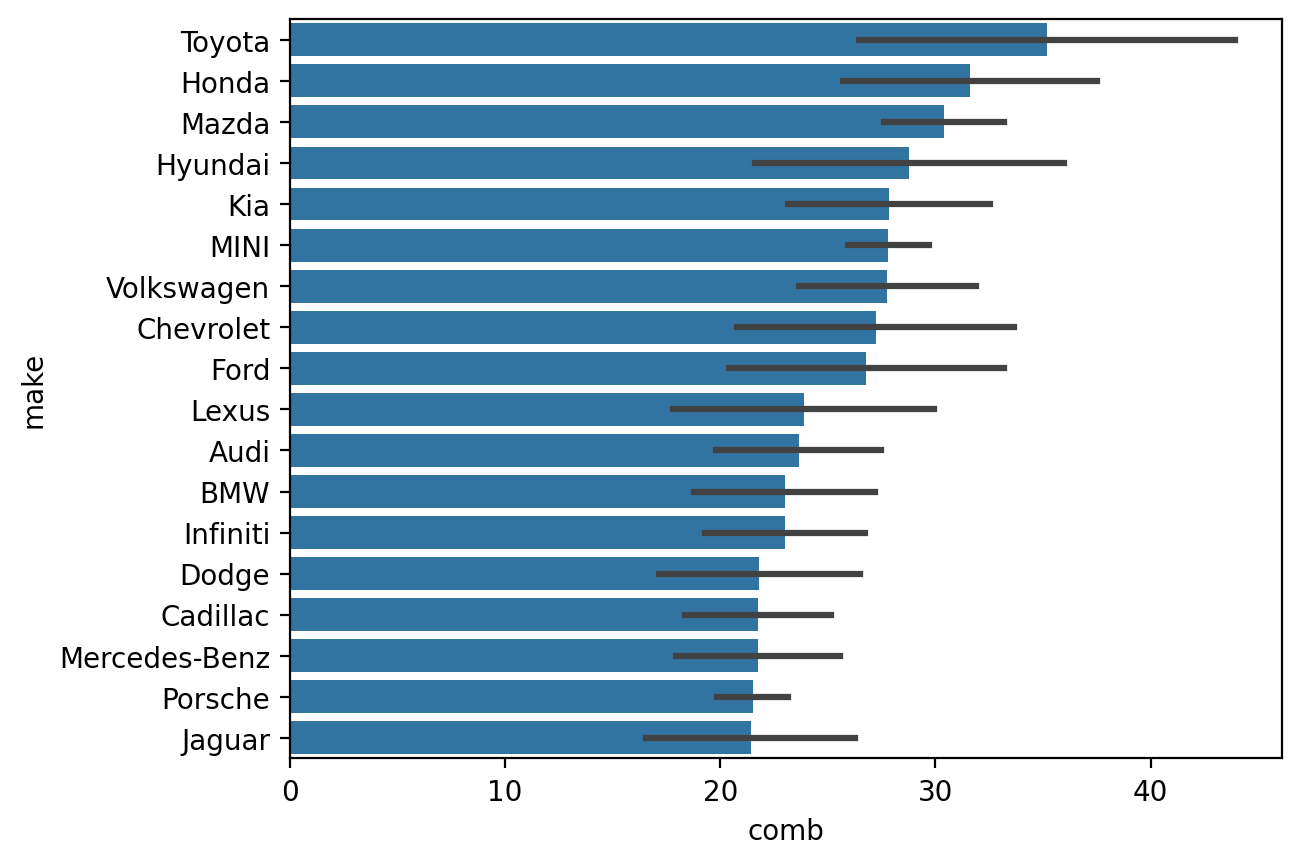

In [120]:
sns.barplot(data=df_plot, y='make', x='comb',order=order, errorbar='sd')
;